In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [5]:
data = pd.read_csv(f'{Project}/Documents/Revision_prep/Experiments/Glul_KO_KD/KD/v20241008/Glu-Gln-ratio-siGlul_result.tsv', sep='\t')

Conds = []
means = []
for key,df in data.groupby('Biological rep'):
    Conds.append(df.iloc[0,0])
    means.append(df['Glu/Gln'].mean())

avg_data = pd.DataFrame({'Cond':Conds, 'Glu/Gln':means})

display(data, avg_data)

,Cond,Biological rep,Glu/Gln
0,D0_siCtl,1,1.147138
1,D0_siCtl,1,1.199388
2,D0_siCtl,1,1.154102
3,D0_siCtl,2,1.100645
4,D0_siCtl,2,1.234641
5,D0_siCtl,2,1.191473
6,D0_siCtl,3,1.285275
7,D0_siCtl,3,1.349277
8,D0_siCtl,3,1.353173
9,D0_siCtl,4,1.031979


,Cond,Glu/Gln
0,D0_siCtl,1.166876
1,D0_siCtl,1.175586
2,D0_siCtl,1.329241
3,D0_siCtl,1.199344
4,D0_siGlul,2.199597
5,D0_siGlul,1.937958
6,D0_siGlul,1.741143
7,D0_siGlul,1.704437


In [7]:
data_dict = {k: list(v) for k, v in avg_data.groupby('Cond')['Glu/Gln']}

display(data_dict, avg_data)

{'D0_siCtl': [1.1668758636666667,
  1.175586187,
  1.3292414866666669,
  1.1993440216666666],
 'D0_siGlul': [2.1995972433333333,
  1.9379580633333333,
  1.7411429626666666,
  1.7044367873333333]}

,Cond,Glu/Gln
0,D0_siCtl,1.166876
1,D0_siCtl,1.175586
2,D0_siCtl,1.329241
3,D0_siCtl,1.199344
4,D0_siGlul,2.199597
5,D0_siGlul,1.937958
6,D0_siGlul,1.741143
7,D0_siGlul,1.704437


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_81678/1891473889.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_data, x="Cond", y='Glu/Gln',
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_81678/1891473889.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=avg_data, x="Cond", y='Glu/Gln',


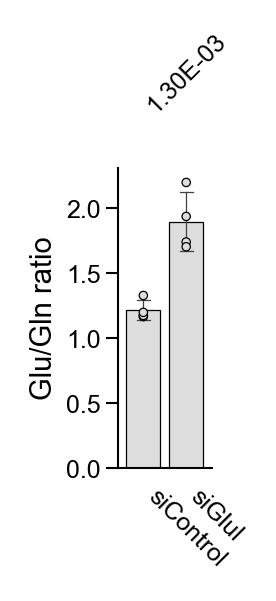

<Figure size 640x480 with 0 Axes>

In [9]:
err_kw = dict(lw=0.5, capsize=3, capthick=0.5)

sF = 1 # Size factor
wgap = 0.25
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [1/7*2 +1/70*2]
height_ratios = [1]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)


ax = fig.add_subplot(grid[0,0])

sns.barplot(data=avg_data, x="Cond", y='Glu/Gln',
            palette=['#DDDDDD','#DDDDDD'], saturation=1,
            width=0.8,
            errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
            ax=ax, linewidth = 0.3, edgecolor='k',
            legend=False)

sns.stripplot(data=avg_data, x="Cond", y='Glu/Gln',
            palette=['#DDDDDD','#DDDDDD'],
            size=2, linewidth=0.3, edgecolor='k',
            jitter=False,
            legend=False)

ax.set_xlim(-0.6, 1.6)
ax.set_xticks(range(2))
ax.set_xticklabels(['siControl','siGlul'], rotation=-45, ha='left')
ax.tick_params(width=0.5, length=3, pad=1)
ax.tick_params(axis='x', length=0, pad=4)

ax.set_xlabel('')
ax.set_ylabel('Glu/Gln ratio', labelpad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Unpaired T-test
from scipy import stats
stat, pv = stats.ttest_ind(data_dict['D0_siCtl'], data_dict['D0_siGlul'])
ax.text(1, 2.7,f'{pv:.2E}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=45)

plt.savefig('Glu-Gln-ratio-siGlul_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()